In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math as ma
import calendar
from datetime import datetime, timedelta
import matplotlib.patches as mpatches

In [2]:
from matplotlib.offsetbox import AnchoredText

In [3]:
df = pd.read_excel(r'Assignment_Dataset.xlsx')

In [4]:
df

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440
...,...,...,...
977,2022-03-20,4.226183,81.632738
978,2022-03-21,3.431675,71.057353
979,2022-03-22,3.580492,81.631509
980,2022-03-23,4.997617,71.906149


In [5]:
df.isnull().sum()

Date    0
GHI     0
PR      0
dtype: int64

In [6]:
df.shape

(982, 3)

In [7]:
start_date = df['Date'].min()
start_date

Timestamp('2019-07-01 00:00:00')

In [8]:
end_date = df['Date'].max()
end_date

Timestamp('2022-03-24 00:00:00')

In [9]:
date_range = pd.date_range(start=start_date, end=end_date, freq='3M')
#Format as Mon/YY
x_ticks = []
for date in date_range:
    x_ticks.append(date.strftime('%b/%y'))

In [10]:
x_ticks

['Jul/19',
 'Oct/19',
 'Jan/20',
 'Apr/20',
 'Jul/20',
 'Oct/20',
 'Jan/21',
 'Apr/21',
 'Jul/21',
 'Oct/21',
 'Jan/22']

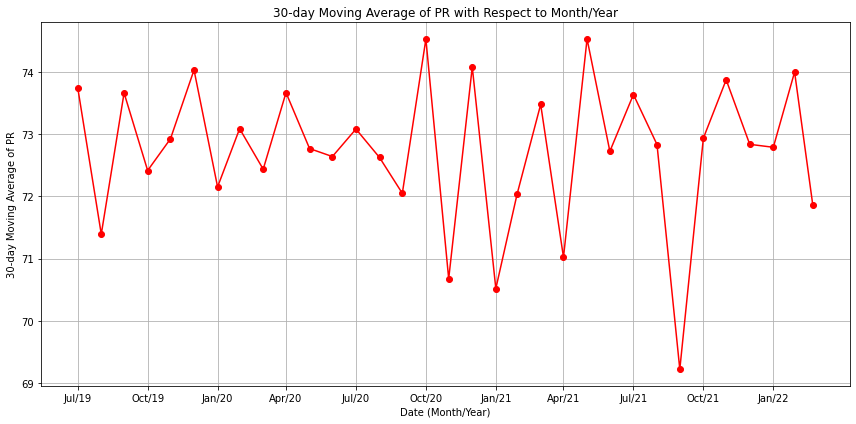

In [19]:
# Plot the 30-day moving average with respect to the month/year
plt.figure(figsize=(12,6))
plt.plot(df_MY['Date'], df_MY['PR_Mov_Avg'], marker='o', linestyle='-', color='red')
plt.xlabel('Date (Month/Year)')
plt.ylabel('30-day Moving Average of PR')
plt.title('30-day Moving Average of PR with Respect to Month/Year')
plt.xticks(date_range, x_ticks)
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
df1

,Date,GHI,PR,PR_Mov_Avg
0,2019-07-01,3.256608,69.575676,69.575676
1,2019-07-02,3.976767,79.314411,74.445044
2,2019-07-03,2.811867,61.020006,69.970031
3,2019-07-04,3.658408,83.262576,73.293167
4,2019-07-05,5.590683,82.124440,75.059422
...,...,...,...,...
977,2022-03-20,4.226183,81.632738,71.181262
978,2022-03-21,3.431675,71.057353,70.789540
979,2022-03-22,3.580492,81.631509,71.231840
980,2022-03-23,4.997617,71.906149,71.249772


In [11]:
df['MonthYear'] = df['Date'].dt.strftime('%b/%y')
df

,Date,GHI,PR,MonthYear
0,2019-07-01,3.256608,69.575676,Jul/19
1,2019-07-02,3.976767,79.314411,Jul/19
2,2019-07-03,2.811867,61.020006,Jul/19
3,2019-07-04,3.658408,83.262576,Jul/19
4,2019-07-05,5.590683,82.124440,Jul/19
...,...,...,...,...
977,2022-03-20,4.226183,81.632738,Mar/22
978,2022-03-21,3.431675,71.057353,Mar/22
979,2022-03-22,3.580492,81.631509,Mar/22
980,2022-03-23,4.997617,71.906149,Mar/22


In [12]:
df['PR'].max()

84.98011969

In [13]:
df

,Date,GHI,PR,MonthYear
0,2019-07-01,3.256608,69.575676,Jul/19
1,2019-07-02,3.976767,79.314411,Jul/19
2,2019-07-03,2.811867,61.020006,Jul/19
3,2019-07-04,3.658408,83.262576,Jul/19
4,2019-07-05,5.590683,82.124440,Jul/19
...,...,...,...,...
977,2022-03-20,4.226183,81.632738,Mar/22
978,2022-03-21,3.431675,71.057353,Mar/22
979,2022-03-22,3.580492,81.631509,Mar/22
980,2022-03-23,4.997617,71.906149,Mar/22


In [15]:
start_date = df['Date'].min()
start_date

Timestamp('2019-07-01 00:00:00')

In [16]:
end_yr = df['Date'].max().year
end_yr

2022

In [17]:
df

,Date,GHI,PR,MonthYear
0,2019-07-01,3.256608,69.575676,Jul/19
1,2019-07-02,3.976767,79.314411,Jul/19
2,2019-07-03,2.811867,61.020006,Jul/19
3,2019-07-04,3.658408,83.262576,Jul/19
4,2019-07-05,5.590683,82.124440,Jul/19
...,...,...,...,...
977,2022-03-20,4.226183,81.632738,Mar/22
978,2022-03-21,3.431675,71.057353,Mar/22
979,2022-03-22,3.580492,81.631509,Mar/22
980,2022-03-23,4.997617,71.906149,Mar/22


In [18]:
df['Budget'] = np.nan

In [36]:
#Budget Calculation

In [19]:
df

,Date,GHI,PR,MonthYear,Budget
0,2019-07-01,3.256608,69.575676,Jul/19,NaN
1,2019-07-02,3.976767,79.314411,Jul/19,NaN
2,2019-07-03,2.811867,61.020006,Jul/19,NaN
3,2019-07-04,3.658408,83.262576,Jul/19,NaN
4,2019-07-05,5.590683,82.124440,Jul/19,NaN
...,...,...,...,...,...
977,2022-03-20,4.226183,81.632738,Mar/22,NaN
978,2022-03-21,3.431675,71.057353,Mar/22,NaN
979,2022-03-22,3.580492,81.631509,Mar/22,NaN
980,2022-03-23,4.997617,71.906149,Mar/22,NaN


In [14]:
initial_budget = 73.9
dec_rate = 0.008

In [20]:
curr_yr = start_date.year
curr_mt = start_date.month
curr_budget = initial_budget

while curr_yr < end_yr:
    year_start = datetime(curr_yr, curr_mt, 1)
    end_date_yr_end = calendar.monthrange(curr_yr, curr_mt-1)[1]
    year_end = datetime(curr_yr + 1, curr_mt-1, end_date_yr_end)
    
    df_to_use = df[(year_start <= df['Date']) & (df['Date'] <= year_end) & (pd.isna(df['Budget']))]
    df.loc[df_to_use.index, 'Budget'] = curr_budget
    
    curr_budget = curr_budget - dec_rate * curr_budget
    curr_yr += 1

In [21]:
df['Budget'] = round(df['Budget'],1)

In [22]:
df

,Date,GHI,PR,MonthYear,Budget
0,2019-07-01,3.256608,69.575676,Jul/19,73.9
1,2019-07-02,3.976767,79.314411,Jul/19,73.9
2,2019-07-03,2.811867,61.020006,Jul/19,73.9
3,2019-07-04,3.658408,83.262576,Jul/19,73.9
4,2019-07-05,5.590683,82.124440,Jul/19,73.9
...,...,...,...,...,...
977,2022-03-20,4.226183,81.632738,Mar/22,72.7
978,2022-03-21,3.431675,71.057353,Mar/22,72.7
979,2022-03-22,3.580492,81.631509,Mar/22,72.7
980,2022-03-23,4.997617,71.906149,Mar/22,72.7


In [23]:
year_start

datetime.datetime(2021, 7, 1, 0, 0)

In [24]:
year_end

datetime.datetime(2022, 6, 30, 0, 0)

In [25]:
df

,Date,GHI,PR,MonthYear,Budget
0,2019-07-01,3.256608,69.575676,Jul/19,73.9
1,2019-07-02,3.976767,79.314411,Jul/19,73.9
2,2019-07-03,2.811867,61.020006,Jul/19,73.9
3,2019-07-04,3.658408,83.262576,Jul/19,73.9
4,2019-07-05,5.590683,82.124440,Jul/19,73.9
...,...,...,...,...,...
977,2022-03-20,4.226183,81.632738,Mar/22,72.7
978,2022-03-21,3.431675,71.057353,Mar/22,72.7
979,2022-03-22,3.580492,81.631509,Mar/22,72.7
980,2022-03-23,4.997617,71.906149,Mar/22,72.7


In [26]:
df

,Date,GHI,PR,MonthYear,Budget
0,2019-07-01,3.256608,69.575676,Jul/19,73.9
1,2019-07-02,3.976767,79.314411,Jul/19,73.9
2,2019-07-03,2.811867,61.020006,Jul/19,73.9
3,2019-07-04,3.658408,83.262576,Jul/19,73.9
4,2019-07-05,5.590683,82.124440,Jul/19,73.9
...,...,...,...,...,...
977,2022-03-20,4.226183,81.632738,Mar/22,72.7
978,2022-03-21,3.431675,71.057353,Mar/22,72.7
979,2022-03-22,3.580492,81.631509,Mar/22,72.7
980,2022-03-23,4.997617,71.906149,Mar/22,72.7


In [27]:
#30-Days Moving Average
df['30-d Moving_Average'] = df['PR'].rolling(30).mean()

In [28]:
df

,Date,GHI,PR,MonthYear,Budget,30-d Moving_Average
0,2019-07-01,3.256608,69.575676,Jul/19,73.9,NaN
1,2019-07-02,3.976767,79.314411,Jul/19,73.9,NaN
2,2019-07-03,2.811867,61.020006,Jul/19,73.9,NaN
3,2019-07-04,3.658408,83.262576,Jul/19,73.9,NaN
4,2019-07-05,5.590683,82.124440,Jul/19,73.9,NaN
...,...,...,...,...,...,...
977,2022-03-20,4.226183,81.632738,Mar/22,72.7,71.181262
978,2022-03-21,3.431675,71.057353,Mar/22,72.7,70.789540
979,2022-03-22,3.580492,81.631509,Mar/22,72.7,71.231840
980,2022-03-23,4.997617,71.906149,Mar/22,72.7,71.249772


In [29]:
# Rolling average periods
roll_avg_period = [7, 30, 60, 90, 365]
roll_avg_legend = ''

for p in roll_avg_period:
    val = df['PR'].rolling(window = p).mean().iloc[-1]
    roll_avg_legend += f'Average PR last {p}-d: {round(val,1)} %\n'

lifetime_avg = df['PR'].mean()

In [30]:
print(roll_avg_legend)

Average PR last 7-d: 73.8 %
Average PR last 30-d: 71.9 %
Average PR last 60-d: 73.0 %
Average PR last 90-d: 73.1 %
Average PR last 365-d: 72.9 %



In [31]:
points_above_budget = df[df['PR'] > df['Budget']]
num_points_above_budget = len(points_above_budget)

In [32]:
num_points_above_budget

479

In [33]:
df.shape[0]

982

In [34]:
num_points_above_budget_percent = round(num_points_above_budget*100/df.shape[0],1)
num_points_above_budget_percent

48.8

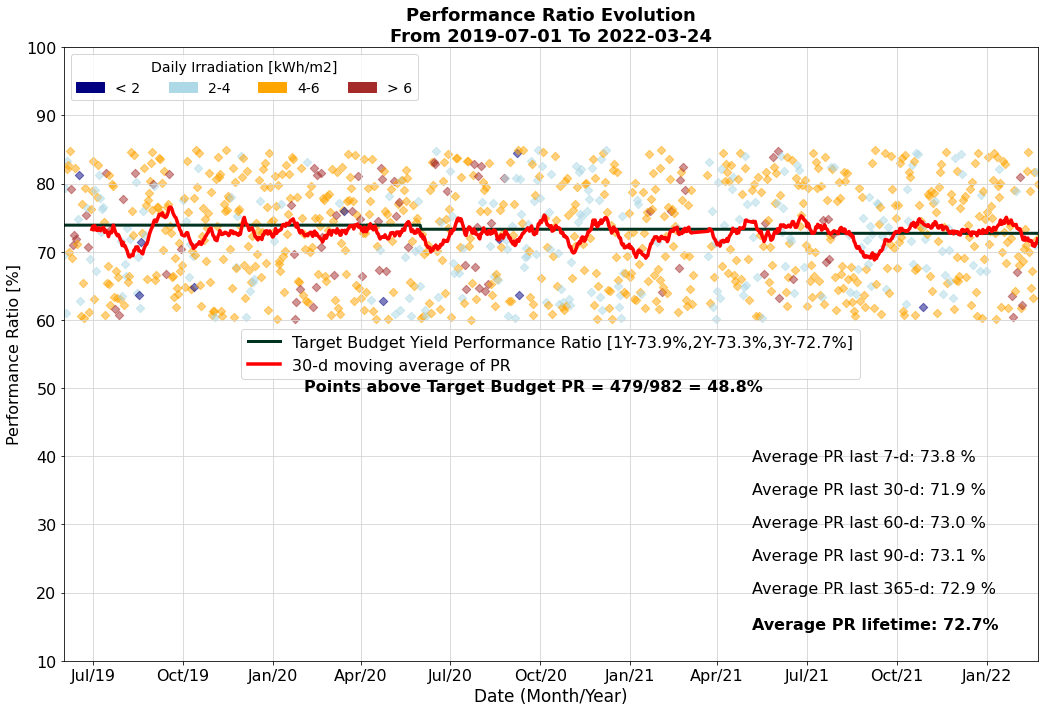

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))
for index, data in df.iterrows():
    x = data['GHI']
    y = data['PR']
    z = data['Date']
    
    if x < 2:
        color = 'navy'
    elif x < 4:
        color = 'lightblue'
    elif x < 6:
        color = 'orange'
    else:
        color = 'brown'
    
    plt.scatter(z, y, c=color, marker='D',alpha=0.5)

blue_patch = mpatches.Patch(color='navy', label='< 2')
lb_patch = mpatches.Patch(color='lightblue', label='2-4')
orange_patch = mpatches.Patch(color='orange', label='4-6')
brown_patch = mpatches.Patch(color='brown', label='> 6')

first_legend=plt.legend(handles=[blue_patch,lb_patch,orange_patch,brown_patch],  loc='upper left',ncol=4, fontsize=14)
first_legend.set_title('Daily Irradiation [kWh/m2]', prop={'size':14})

ax.plot(df['Date'], df['Budget'], color='#013220', linewidth=3, label = 'Target Budget Yield Performance Ratio [1Y-73.9%,2Y-73.3%,3Y-72.7%]')
ax.plot(df['Date'], df['30-d Moving_Average'],color='red', linewidth=3.5,label='30-d moving average of PR')

fig.text(0.285, 0.45, 
         f'Points above Target Budget PR = {num_points_above_budget}/{df.shape[0]} = {num_points_above_budget_percent}%', 
         style = 'normal',
         fontsize = 16,
         color = "black",
         weight="bold")


plt.text(0.7, 0.12, roll_avg_legend, transform=plt.gcf().transFigure, ha='left', va='bottom', linespacing=2.5, fontsize = 16)

fig.text(0.7, 0.12, 
         f'Average PR lifetime: {round(lifetime_avg,1)}%', 
         style = 'normal',
         fontsize = 16,
         color = "black",
         weight="bold")

plt.xlabel('Date (Month/Year)',fontsize=17)
plt.ylabel('Performance Ratio [%]',fontsize=16)
plt.title(f"Performance Ratio Evolution\nFrom {df['Date'].min().strftime('%Y-%m-%d')} To {df['Date'].max().strftime('%Y-%m-%d')}", fontsize=18, weight='bold')
plt.xticks(date_range, x_ticks,fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(10,100)
plt.xlim(df['Date'].min(),df['Date'].max())
plt.grid(color='#D3D3D3')
plt.tight_layout()
ax.legend(loc="center", fontsize=16)
plt.gca().add_artist(first_legend)
plt.show()
